In [1]:
from lib.utils import *
from tqdm import tqdm
X,y = load_and_window_nursing_list([0])
X = X[:,:101]
X_train,X_dev,y_train,y_dev = train_test_split(X,y,test_size=.2,stratify=y)
trainloader = DataLoader(TensorDataset(X_train,y_train),batch_size=64,shuffle=True)
devloader = DataLoader(TensorDataset(X_dev,y_dev),batch_size=64,shuffle=True)

/home/andrew/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
import torch.nn as nn
class Autoencoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(101,50),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(50,101)
        )
    def forward(self,x):
        code = self.encoder(x)
        return self.decoder(code)
device = 'cuda'
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

100%|██████████| 1000/1000 [05:06<00:00,  3.26it/s]


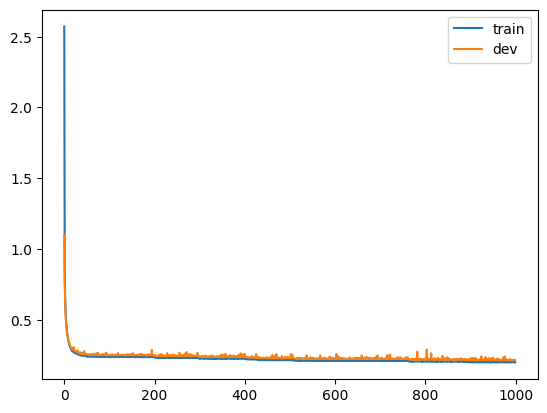

In [3]:
loss_tr = []
loss_dev = []
pbar = tqdm(range(1000))

for epoch in pbar:
    # train loop
    model.train()
    loss_tr_total = 0
    for (X_tr,y_tr) in trainloader:
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,X_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_tr_total += loss.item()
    loss_tr.append(loss_tr_total/len(trainloader))

    # dev loop
    model.eval()
    loss_dev_total = 0
    for (X_dv,y_dv) in devloader:
        X_dv,y_dv = X_dv.to(device),y_dv.to(device)
        logits = model(X_dv)
        loss = criterion(logits,X_dv)
        loss_dev_total += loss.item()
    loss_dev.append(loss_dev_total/len(devloader))
plt.plot(loss_tr,label='train')
plt.plot(loss_dev,label='dev')
plt.legend()

In [4]:
criterion(model(X_dev.cuda()),X_dev.cuda())

tensor(0.2163, device='cuda:0', grad_fn=<MseLossBackward0>)

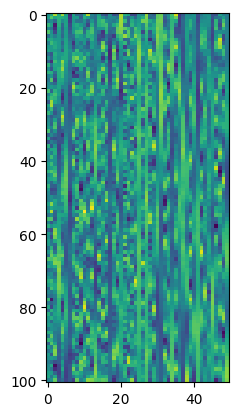

In [17]:
plt.imshow(model.decoder[0].weight.detach().cpu())
# plt.imshow(model.encoder[0].weight.detach().cpu())

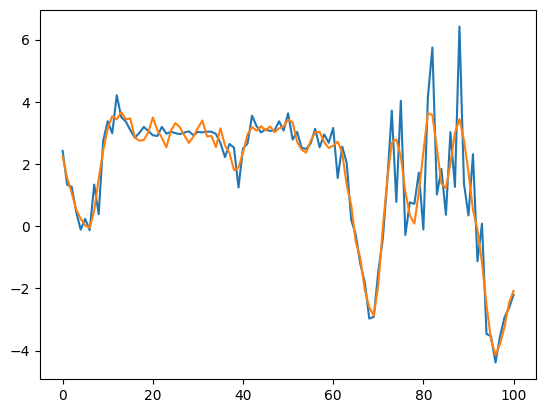

In [16]:
i = 9
plt.plot(X_dev[i])
plt.plot(model(X_dev[i].cuda()).detach().cpu())

In [ ]:
code = ae.encoder(X)
from sklearn.manifold import TSNE
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components,learning_rate='auto',init='pca')
tsne_result = tsne.fit_transform(X)
df = pd.DataFrame(tsne_result)
df['label'] = y

In [ ]:

import seaborn as sns
sns.scatterplot(data=df,x=0,y=1,hue='label')